In [1]:
import pandas as pd
import numpy as np 

# Basic Loading

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

https://nikgrozev.com/2015/12/27/pandas-in-jupyter-quickstart-and-useful-snippets/

In [2]:
df1 = pd.read_csv('data/file1.psv', sep='|', 
                     quotechar='"', quoting=1,
                     skiprows=1, skipfooter=1, 
                     engine='python',
                     index_col='KEY'
                    )

print( df1.dtypes )
df1.head()

H        object
COL1      int64
COL2    float64
COL3     object
COL4     object
dtype: object


,H,COL1,COL2,COL3,COL4
KEY,,,,,
100,D,2,0.7,C,2018-08-24
101,D,3,2.3,C,2018-08-25
102,D,4,1.4,C,2018-08-26
103,D,5,8.0,C,2018-08-27
104,D,4,-3.0,C,2018-08-28


In [3]:
df1.iloc[1:3]

,H,COL1,COL2,COL3,COL4
KEY,,,,,
101,D,3,2.3,C,2018-08-25
102,D,4,1.4,C,2018-08-26


In [4]:
df1[df1.COL3.str.contains('B')].head(3)

,H,COL1,COL2,COL3,COL4
KEY,,,,,


In [5]:
df1.sort_values(by=['COL2', 'COL1'], ascending=False).head(3)

,H,COL1,COL2,COL3,COL4
KEY,,,,,
103,D,5,8.0,C,2018-08-27
101,D,3,2.3,C,2018-08-25
108,D,0,2.3,C,2018-09-01


In [6]:
def date_parser(s):
    return pd.datetime.strptime(s, '%Y-%m-%d')

df2 = pd.read_csv('data/file2.psv', sep='|', 
                     quotechar='"', quoting=1,
                     skiprows=1, skipfooter=1, 
                     skipinitialspace=True, 
                     engine='python',
                     parse_dates=['COL4'], date_parser=date_parser,
                     index_col='KEY'
                    )
print( df2.dtypes )

H               object
COL1             int64
COL2           float64
COL3            object
COL4    datetime64[ns]
dtype: object


In [7]:
df2.sort_values(by=['COL4'], ascending=False).head(3)

,H,COL1,COL2,COL3,COL4
KEY,,,,,
113,D,4,4.3,CCC,2018-08-02
112,D,1,1.5,AAA,2018-08-01
111,D,7,2.0,FFF,2018-07-30


## Plotting

```df.plot.```   <=== Type this in a code section hit 'tab' key to see help!

http://pandas.pydata.org/pandas-docs/stable/visualization.html


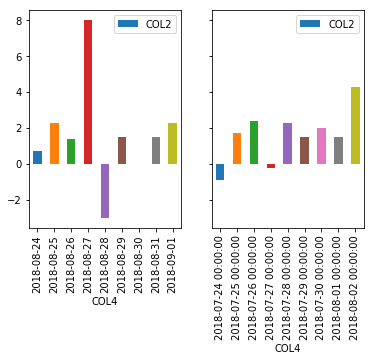

In [9]:
import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots( nrows=1, ncols=2, sharey=True )

df1.plot( ax=axes[0], x='COL4', y='COL2', kind = 'bar' )
df2.plot.bar( ax=axes[1], x='COL4', y='COL2' )

plt.show()

# Joining

https://pandas.pydata.org/pandas-docs/stable/merging.html

In [ ]:
df1_cols = ['COL1','COL2']
df2_cols = ['COL3','COL4']

j = pd.concat( [ df1[ df1_cols ] , df2[ df2_cols ] ], 
              axis=1, sort=False, join='inner' )

j

In [ ]:
def g(x):
    return x*100

j['new'] = g( j.COL1 )
j

# Pivot Tables
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table

In [ ]:
pd.DataFrame.pivot_table(j, values='COL2', index=['COL1', 'COL3'],
                                 fill_value="",
                                 columns=['new'], aggfunc=np.sum)